___

<a href='http://www.pieriandata.com'> <img src='./Pierian_Data_Logo.png' /></a>
___

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

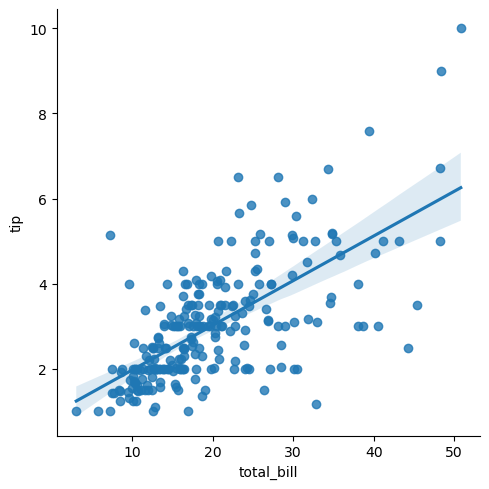

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips);   
#when we run that we see a scatter plot with a linear fit on top of it. You can also specify 'hue' as well if you want some separation based off a categorical feature like 'sex'.

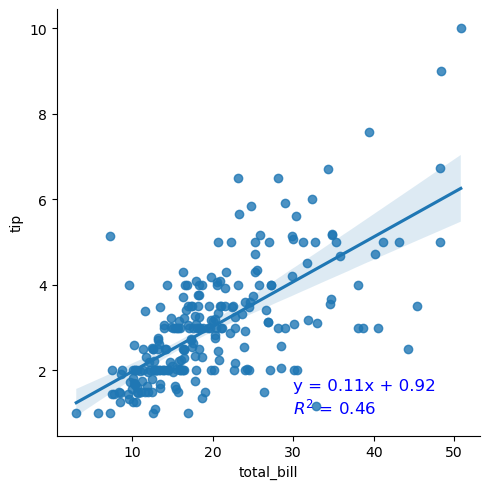

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data
tips = sns.load_dataset("tips")

# Compute regression stats
slope, intercept, r_value, p_value, std_err = linregress(tips['total_bill'], tips['tip'])

# Plot with sns.lmplot
plot = sns.lmplot(x='total_bill', y='tip', data=tips)

# Format regression equation and R²
equation = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}'

# Add text to the plot
plt.text(x=30, y=1, s=equation, fontsize=12, color='blue')

plt.show()


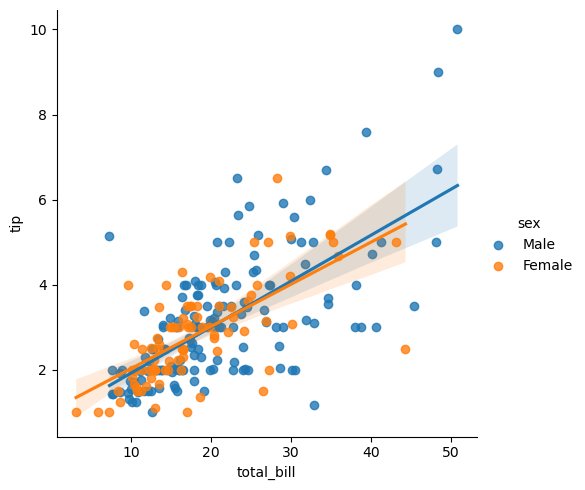

In [7]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex');

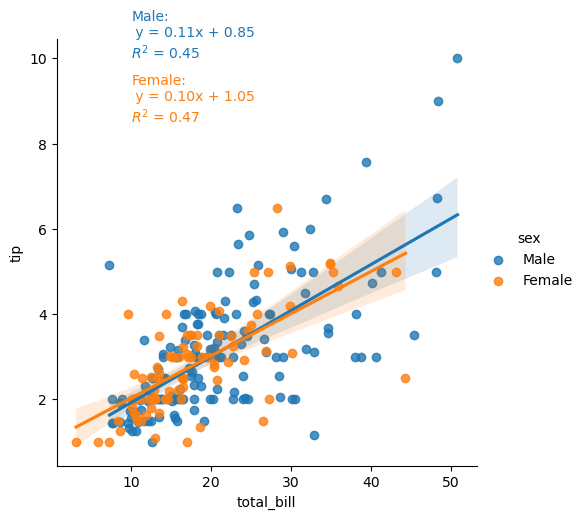

In [18]:
'''
when you're using sns.lmplot(..., hue='sex'), Seaborn draws separate regression lines for each group (in this case, 'Male' and 'Female'). To show the regression equation and $R^2$ for each line, you need to:
1) Group the data by 'sex'.
2) Compute regression stats (slope, intercept, R²) for each group.
3) Plot the regression lines using sns.lmplot.
4) Manually annotate each group’s line.
'''
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load dataset
tips = sns.load_dataset("tips")

# Plot with hue
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

# Compute and annotate regression info per group
for sex, group_data in tips.groupby('sex', observed=True):
    slope, intercept, r_value, p_value, std_err = linregress(group_data['total_bill'], group_data['tip'])
    eq = f"{sex}:\n y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}"
    
    # Choose a reasonable position for the text
    if sex == 'Male':
        plt.text(10, 10, eq, color='C0', fontsize=10)
    else:
        plt.text(10, 8.5, eq, color='C1', fontsize=10)


In [23]:
for a, b in tips.groupby('sex', observed=True):
    print(f"Group: {a}\n{b.head()}\n")
'''
'a' refers to the group key, which in this case is the unique values of the 'sex' column (i.e., 'Male' or 'Female').
'b' is a DataFrame that contains all the rows in tips where sex == a.
First iteration:
a = 'Male'
b = DataFrame with only rows where sex == 'Male'
Second iteration:
a = 'Female'
b = DataFrame with only rows where sex == 'Female'

👉 What is a group key?
A group key is the value used to divide your data into groups when you use groupby() in pandas.
Example:
If you write:
tips.groupby('sex')
You're telling pandas:
"Group the data based on the values in the sex column."
Here, the group keys are:
'Male'
'Female'
These are the unique values in the column you grouped by. For each key, pandas collects the matching rows into a subgroup.
''';

Group: Male
   total_bill   tip   sex smoker  day    time  size
1       10.34  1.66  Male     No  Sun  Dinner     3
2       21.01  3.50  Male     No  Sun  Dinner     3
3       23.68  3.31  Male     No  Sun  Dinner     2
5       25.29  4.71  Male     No  Sun  Dinner     4
6        8.77  2.00  Male     No  Sun  Dinner     2

Group: Female
    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
11       35.26  5.00  Female     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3



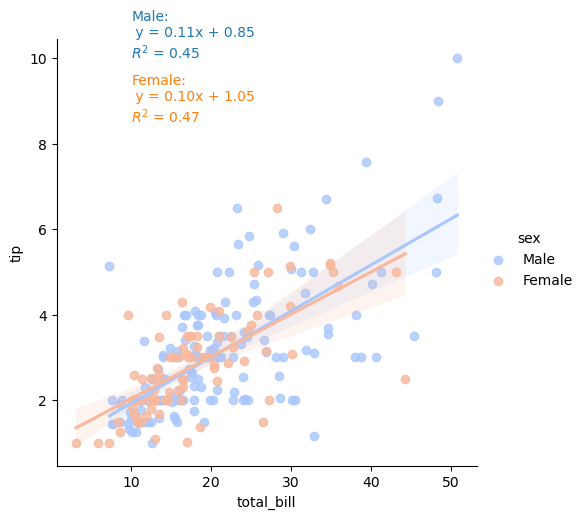

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')
# Compute and annotate regression info per group
for sex, group_data in tips.groupby('sex', observed=True):
    slope, intercept, r_value, p_value, std_err = linregress(group_data['total_bill'], group_data['tip'])
    eq = f"{sex}:\n y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}"
    
    # Choose a reasonable position for the text
    if sex == 'Male':
        plt.text(10, 10, eq, color='C0', fontsize=10)
    else:
        plt.text(10, 8.5, eq, color='C1', fontsize=10)
    
'''
An R² (R-squared) value of 0.47 means that:
    47% of the variance in your dependent variable (e.g., tip) can be explained by your independent variable (e.g., total_bill) using your linear regression model.
🔍 Interpretation:
    R² = 0.47 → Your model has moderate explanatory power.
    53% of the variation is still unexplained (by noise, missing variables, or non-linear relationships).
    It’s not terrible, but not very strong either.
✅ When is R² good enough?
It depends on your context:
    In social sciences, even 0.3–0.5 might be acceptable due to human variability.
    In engineering or physics, you'd expect a higher R² (like 0.9+).
    If you're predicting tips based only on total_bill, it's realistic that it's not a perfect predictor.
    '''

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

In [ ]:
'''
🧠 What It's About:
You're working with Seaborn's lmplot(), and you're trying to customize the appearance of the scatter plot markers — specifically their size.
🔁 The Chain of Function Calls
Here’s what’s happening under the hood:
    You call sns.lmplot(...).
    Internally, lmplot() calls regplot().
    regplot() uses Matplotlib’s plt.scatter() to draw the scatter plot.

To control how the scatter plot looks, you can pass custom arguments through a special keyword argument: scatter_kws.
✅ What is scatter_kws?
It’s a dictionary of keyword arguments that gets sent to plt.scatter().
For example:
    sns.lmplot(x="total_bill", y="tip", data=tips, scatter_kws={"s": 50})
Here:
scatter_kws={"s": 50} tells Matplotlib to use marker size 50 in the scatter plot.
s stands for size, but:
⚠️ In Matplotlib, s actually controls the area of the marker — not the radius.
So s=50 means the marker's area is 50 points squared.

😵 Why is it Confusing?
You're passing a parameter (s) to lmplot() using a dictionary (scatter_kws)...
That gets passed to regplot()...
That gets passed to plt.scatter()...
And s doesn't behave like a linear size — it's the square of the marker size.

🧩 Summary:
Use scatter_kws={"s": N} to control marker size in lmplot().
The s value is area in points², not radius.
You're passing this dictionary all the way through to Matplotlib.
'''

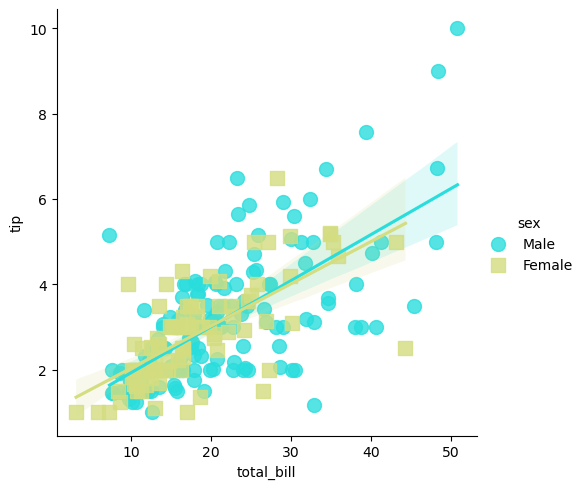

In [36]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='rainbow',
           markers=['o','s'],scatter_kws={'s':100});

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

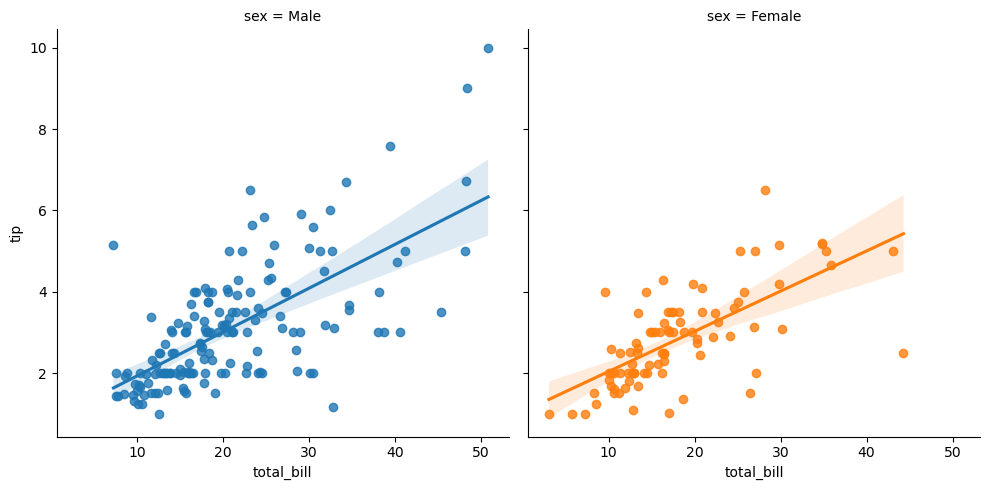

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex', hue= 'sex'); #Instead of separating by color you're separating by columns.
'''
✅ 1. sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')
What it does:
Plots both sexes (Male and Female) on a single plot, using different colors for each.

You get:
One shared regression plot
A legend distinguishing Male vs Female
Both regression lines drawn on the same axes

✅ 2. sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')
What it does:
Creates separate plots for each sex — one for Male and one for Female — placed side by side in columns.

You get:
Two subplots, one per value of 'sex'
Separate regression lines in independent plots
Helpful when you want to see each group isolated


'''

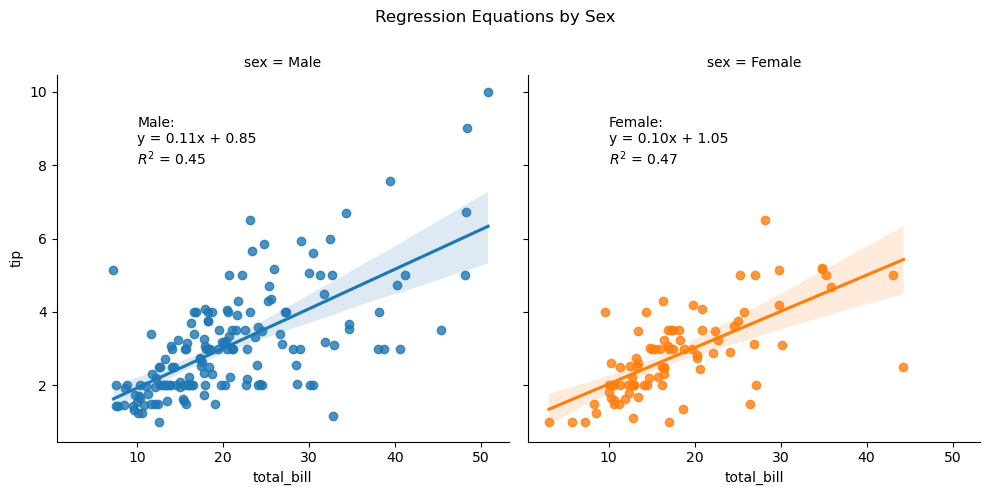

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load dataset
tips = sns.load_dataset("tips")

# Create lmplot with one plot per 'sex'
g = sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', hue='sex')

# Loop through each group and compute regression
for sex, group_data in tips.groupby('sex', observed=True):
    # Regression statistics
    slope, intercept, r_value, p_value, std_err = linregress(group_data['total_bill'], group_data['tip'])
    eq = f"{sex}:\ny = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}"
    
    # Access correct axis from FacetGrid
    ax = g.axes[0][0] if sex == 'Male' else g.axes[0][1]
    
    # Add the text to the plot
    ax.text(10, 8, eq, color='black', fontsize=10)

# Optional: Set a main title
plt.subplots_adjust(top=0.85)
g.figure.suptitle("Regression Equations by Sex")

plt.show()
'''
 Key Concepts:
    g = sns.lmplot(...) returns a FacetGrid.
    g.axes[0][0] is the axis for the first column ("Male" by default), g.axes[0][1] is for "Female".
    ax.text(...) is used to add the annotation to the correct subplot.
''';

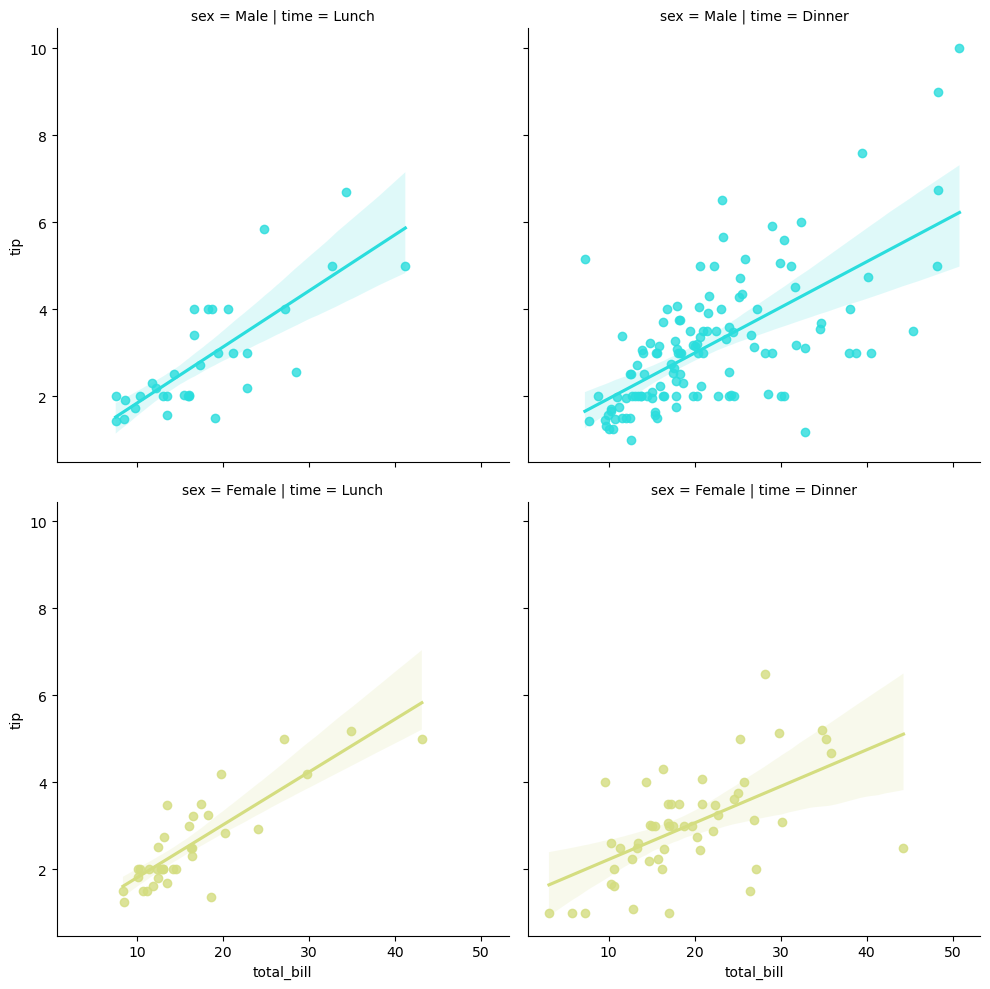

In [50]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips, hue='sex',palette='rainbow');

In [52]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [58]:
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_time        object
dtype: object


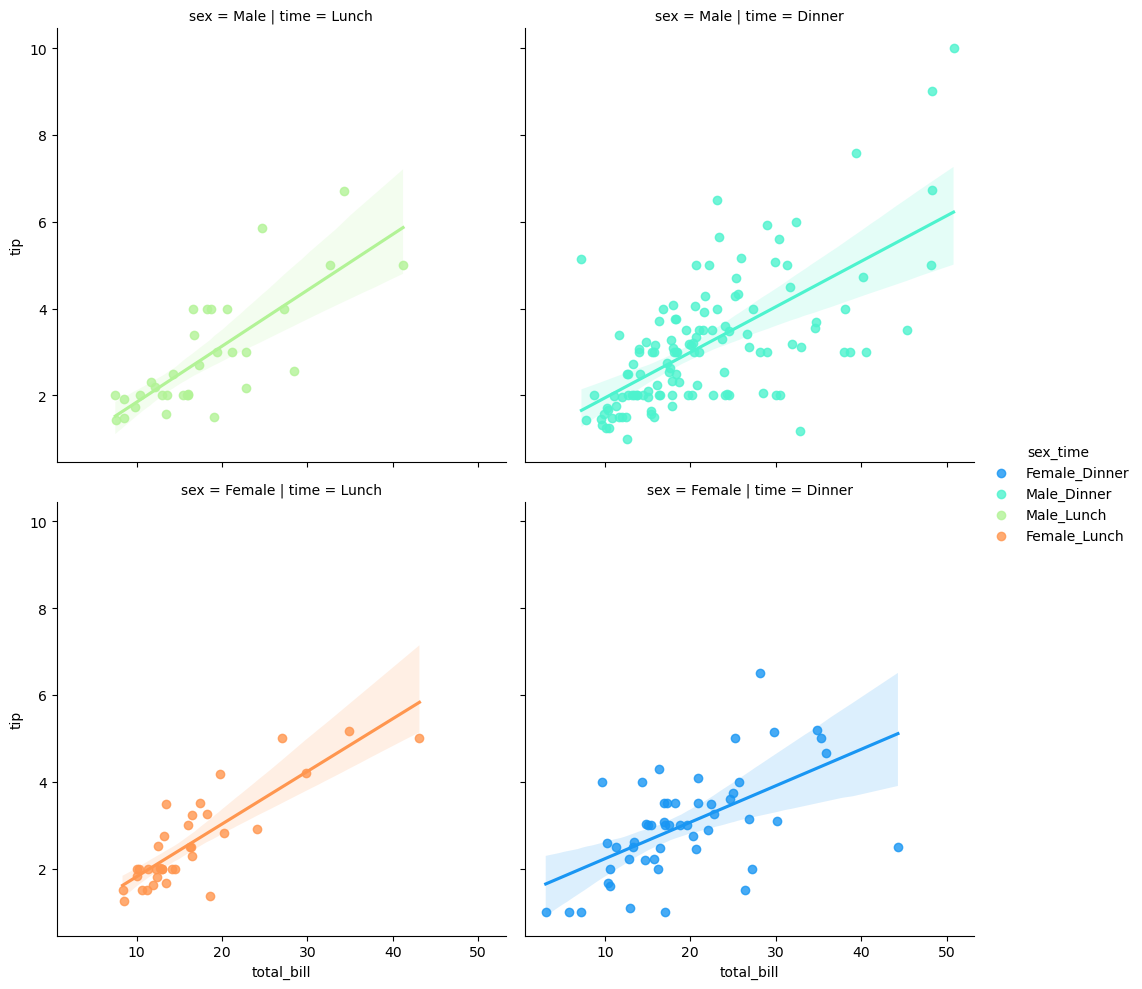

In [ ]:
tips['sex_time'] = tips['sex'].astype(str) + '_' + tips['time'].astype(str)
#.astype(str) converts the Categorical values (e.g., Male, Female) into plain Python strings.
# Now string + string = ✅

sns.lmplot(x="total_bill", y="tip",
           row="sex", col="time",
           data=tips,
           hue="sex_time",
           palette="rainbow");

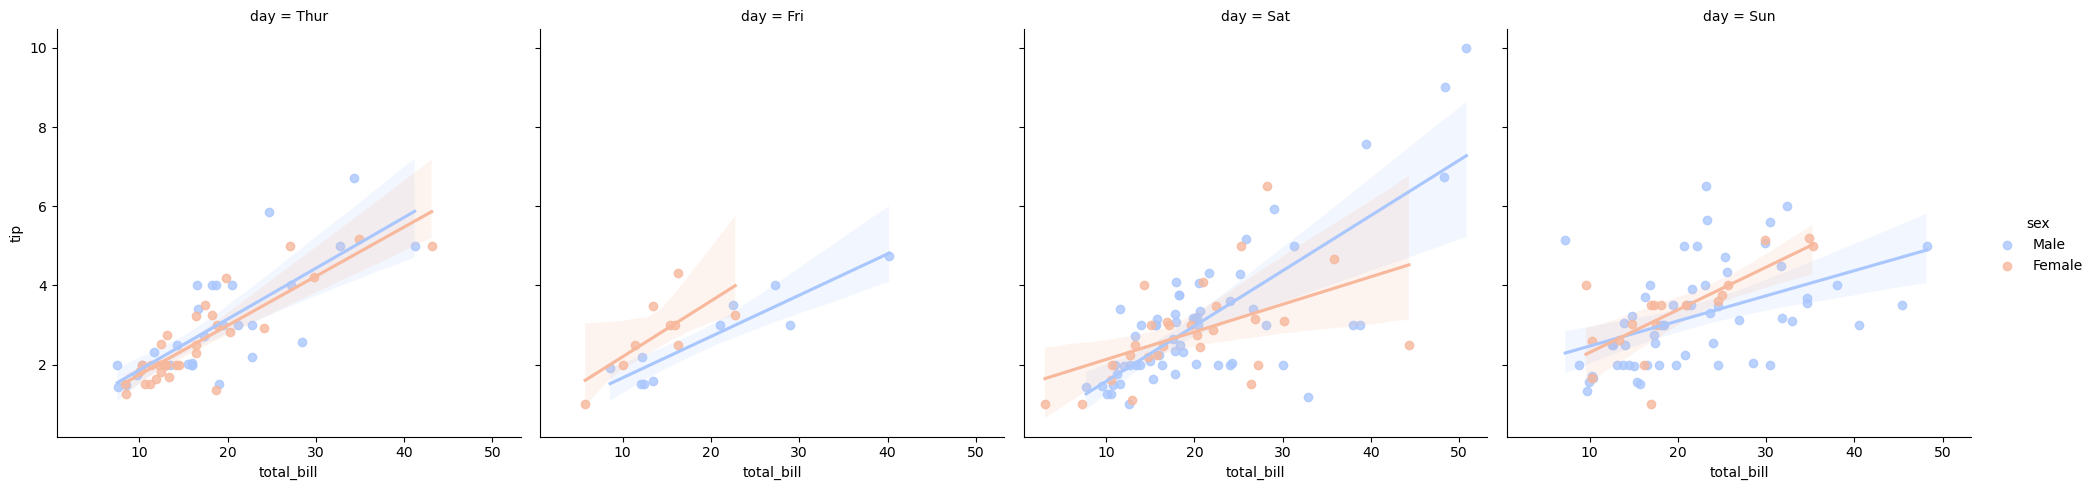

In [60]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm');

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

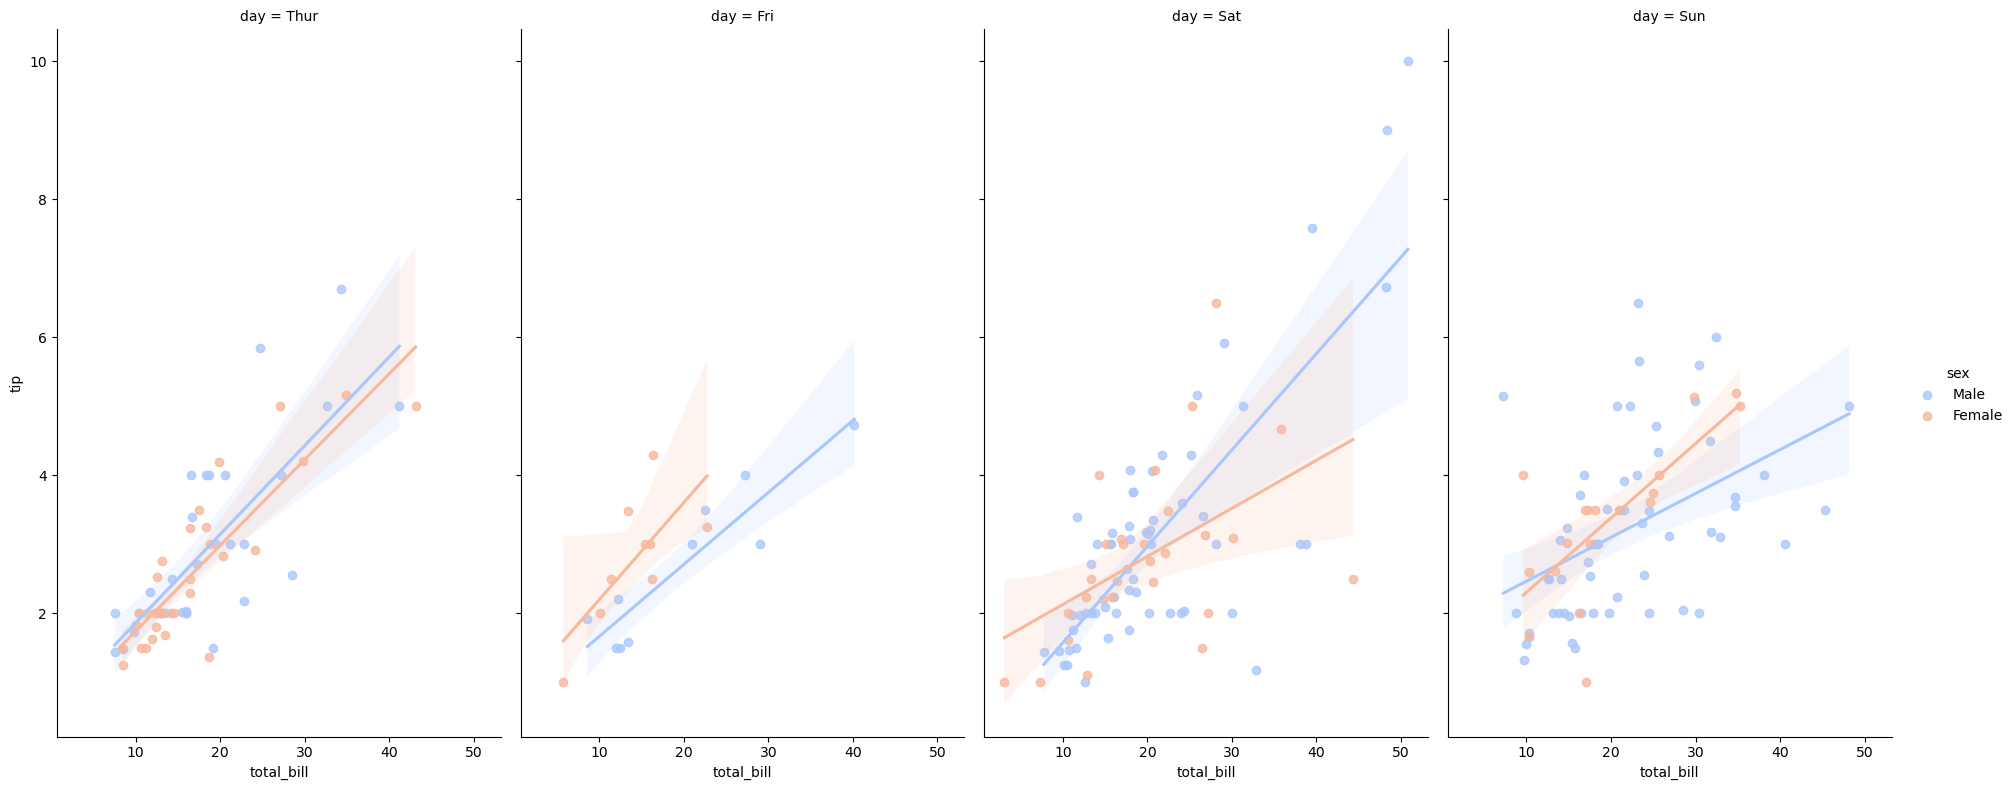

In [63]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,height=8)
'''
Quick Explanation of Parameters:
    height=8: height (in inches) of each facet
    aspect=0.6: width = 0.6 × height → here, width = 4.8 inches
    So each subplot will be 8" tall and 4.8" wide
''';

You're probably wondering how to change the font size or control the aesthetics even more, check out the Style and Color Lecture and Notebook for more info on that!

# Great Job!